In [1]:
%load_ext autoreload
%autoreload 5

In [2]:
import json
import numpy as np
import pandas as pd
import random
from weight_lifting import WeightLifting

In [3]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO (MINIMO DE ALTERACOES POSSIVEIS NOS DADOS)

Model: LR
Accuracy: 0.9811
F1: 0.9583
Precision: 0.9669
Recall: 0.9504

[[323   2   0   0   0]
 [  6 210   2   0   0]
 [  2   2  22   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score   support

           A       0.98      0.99      0.98       325
           B       0.98      0.96      0.97       218
           C       0.92      0.85      0.88        26
           D       0.97      0.95      0.96        65
           E       0.99      0.99      0.99       372

    accuracy                           0.98      1006
   macro avg       0.97      0.95      0.96      1006
weighted avg       0.98      0.98      0.98      1006




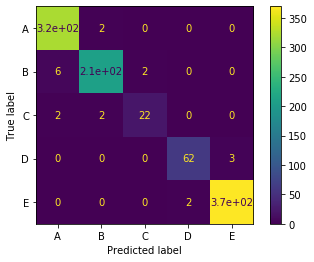

--------------------------------------------
Model: SVM
Accuracy: 0.6988
F1: 0.621
Precision: 0.855
Recall: 0.558

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score   support

           A       0.94      0.63      0.75       325
           B       0.90      0.45      0.60       218
           C       0.92      0.42      0.58        26
           D       0.95      0.29      0.45        65
           E       0.57      1.00      0.73       372

    accuracy                           0.70      1006
   macro avg       0.85      0.56      0.62      1006
weighted avg       0.79      0.70      0.69      1006




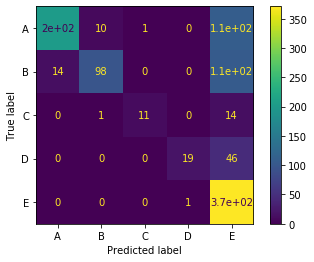

--------------------------------------------
Model: MPL
Accuracy: 0.3231
F1: 0.0977
Precision: 0.0646
Recall: 0.2

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score   support

           A       0.32      1.00      0.49       325
           B       0.00      0.00      0.00       218
           C       0.00      0.00      0.00        26
           D       0.00      0.00      0.00        65
           E       0.00      0.00      0.00       372

    accuracy                           0.32      1006
   macro avg       0.06      0.20      0.10      1006
weighted avg       0.10      0.32      0.16      1006




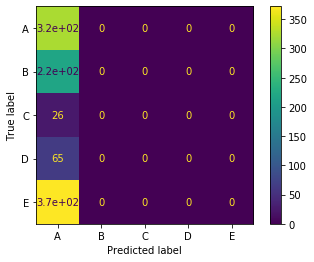

--------------------------------------------


In [4]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.createTrainTest(df)
base_padrao_predict = engine.fitAndPredict(X_train, X_test, y_train, y_test)
engine.plot_results(base_padrao_predict, X_test, y_test)